ES 335 Pre-requisite Exam
Name: Harinarayan J
Roll: 23110128

Question 1

Multiplications: The resultant matrix will have n * m elements. Each element will require k multiplications. Hence, total multiplications required is n * m * k.

Additions: Each of the k multiplications from the above will need to be added to get the resultant matrix element. This would require k-1 additions for each element, resulting in n * m * (k-1) additions in total.


In [10]:
# Question 2

import numpy as np
import time

A = np.random.rand(500, 100)
B = np.random.rand(100, 500)
C = [[0 for i in range(len(B[0]))] for i in range(len(A))]

l_s = time.time()
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]
l_e = time.time()
l_t = l_e-l_s


n_s = time.time()
Cn = np.dot(A, B)
n_e = time.time()
n_t = n_e-n_s


print("List Method Time:", l_t )
print("Numpy Method Time:", n_t )



List Method Time: 20.95735001564026
Numpy Method Time: 0.0


The above code compares the numpy and list of lists multiplication. Numpy is clearly faster. This is mainly due to the numpy library using a C++ backend which is faster than Python and possible optimizations in matrix multiplication method.


In [20]:
# Question 3

import numpy as np
import time

# Method 1 - Passing through each element and finding the position of a single element. Time complexity O(n^2)

A = np.random.randint(0, 10000, 80000)
n = (len(A)+1)//2

s1 = time.time()
for i in range(len(A)):
    a = A[i]
    b = 0
    c = 0
    for j in range(len(A)):
        if A[j]>=a: b+=1
        if A[j]<=a: c+=1
    if b>=n and c>=n: 
        print(a)
        break
e1 = time.time()
t1 = e1-s1


# Method 2 - Sorting and selecting the middle element. Time complexity O(n log n)
# Note: Using python sort which is optimized, so time taken might be lesser than an user defined sort.

B = A[:]
s2 = time.time()
B.sort()

if len(B)%2 == 1:
    print(B[len(B)//2])
else:
    print((B[len(B)//2 - 1]+B[len(B)//2 + 1])/2)

e2 = time.time()
t2 = e2-s2

# Method 3: Numpy

C = A[:]
s3 = time.time()
print(np.median(C))
e3 = time.time()
t3 = e3-s3

print("Method 1 Time:", t1 )
print("Method 2 Time:", t2 )
print("Numpy Method Time:", t3 )

4969
4969.0
4969.0
Method 1 Time: 168.34066033363342
Method 2 Time: 0.008305788040161133
Numpy Method Time: 0.0


The above code shows three different methods to find the median. It can be ranked as method 1 is the slowest. On multiple testing, I found that the second method might be a bit faster for some cases, but the numpy method is generally faster. This is due to optimization techniques and C++ backend as mentioned earlier. The time complexity mentioned in comments explains why Method 1 is the slowest.

Question 4

The gradient with respect to x:

2xy + (y^3)* (cos(x))

The gradient with respect to y:

x^2 + (3(y)^2)* (sin(x))

In [24]:
# Question 5

import math
import jax
import jax.numpy as jnp

def fun(x,y):
    return x**2 * y + y**3 * jnp.sin(x)

def manual(x,y): 
    return [2*x*y + y**3 * jnp.cos(x), x**2 + 3* y**2 * jnp.sin(x) ]

test_p = np.random.rand(10, 2)

for p in test_p:
    x, y = p
    j_g = jax.grad(fun(x,y))
    m_g = manual(x,y)
    print(x, y)
    print(j_g, m_g)

ModuleNotFoundError: No module named 'jax'

In [22]:
# Question 6

import sympy as sp

x, y = sp.symbols("x,y")
f = x**2 * y + y**3 * sp.sin(x)

g_x = sp.diff(f, x)
g_y = sp.diff(f, y)

display(g_x)
display(g_y)

2*x*y + y**3*cos(x)

x**2 + 3*y**2*sin(x)

In [25]:
# Question 7

s = {
    2022: {
        "Branch 1": {
            1: {
                "Roll no": 1,
                "Name": "A",
                "Marks": {
                    "Maths": 75,
                    "English": 75
                }
            },
        },
        "Branch 2": {
            2: {
                "Roll no": 2,
                "Name": "B",
                "Marks": {
                    "Maths": 80,
                    "English": 80
                }
            },
			3: {
                "Roll no": 3,
                "Name": "C",
                "Marks": {
                    "Maths": 90,
                    "English": 90
                }
            }

        }
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}

In [ ]:
# Question 8


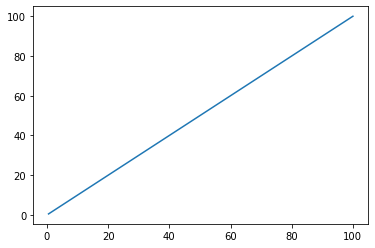

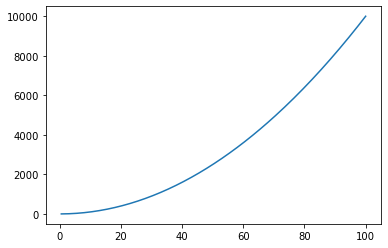

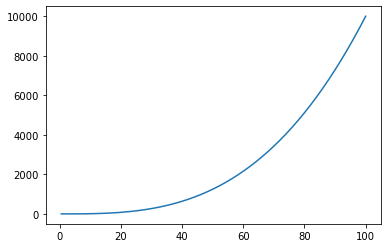

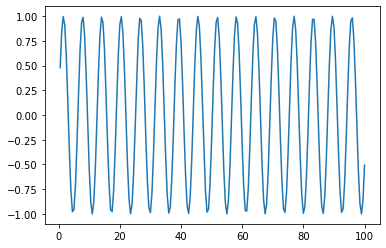

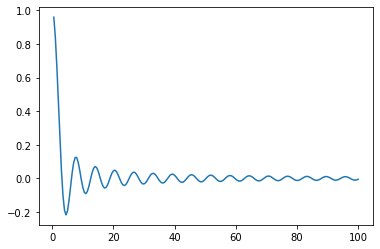

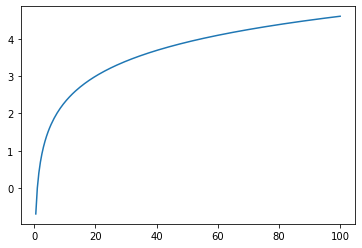

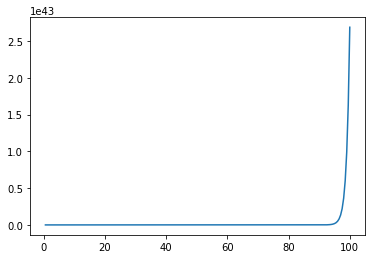

In [26]:
# Question 9

import matplotlib.pyplot as plt

def plot_(fun):
    x = np.arange(0.5, 100.5, 0.5)
    y = fun(x)
    plt.plot(x,y)
    plt.show()

plot_(lambda x: x)
plot_(lambda x: x**2)
plot_(lambda x: x**3 /100)
plot_(lambda x: np.sin(x))
plot_(lambda x: np.sin(x)/x)
plot_(lambda x: np.log(x))
plot_(lambda x: np.exp(x))


In [27]:
# Question 10

import pandas as pd

C = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(C, columns=["a", "b", "c", "d", "e"])

c_h = df.std().idxmax()

r_l = df.mean(axis=1).idxmin()

print("Column with the max std:",c_h)
print("Row with the min mean:", r_l)

Column with the max std: d
Row with the min mean: 5


In [30]:
# Question 11

df["f"] = df.sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

l_c = (df["g"] == 'LT8').sum()
s_l = df[df["g"] == 'LT8']["f"].std()
s_g = df[df["g"] == 'GT8']["f"].std()

print("Std for lt8:", s_l)
print("Std for gt8:", s_g)
print(df)

Std for lt8: nan
Std for gt8: 2.000587149948889
           a         b         c         d         e          f    g
0   1.419785  1.882057  1.143023  1.874742  1.460613  23.340658  GT8
1   1.203195  1.613139  1.302797  1.144004  1.398454  19.984764  GT8
2   1.575864  1.726978  1.891060  1.200867  1.869881  24.793949  GT8
3   1.379421  1.831896  1.599423  1.988309  1.162053  23.883306  GT8
4   1.098155  1.932839  1.094661  1.962002  1.052170  21.419479  GT8
5   1.029141  1.676784  1.080968  1.039322  1.715087  19.623909  GT8
6   1.045239  1.441168  1.934580  1.853260  1.831438  24.317057  GT8
7   1.146706  1.099195  1.909724  1.291760  1.813538  21.782768  GT8
8   1.961639  1.871549  1.573792  1.993433  1.222371  25.868353  GT8
9   1.458734  1.638467  1.967081  1.515358  1.711815  24.874364  GT8
10  1.666605  1.961192  1.903140  1.400852  1.806803  26.215777  GT8
11  1.932099  1.039169  1.511878  1.221277  1.250430  20.864559  GT8
12  1.467542  1.025652  1.137208  1.209026  1.824154  1

In [31]:
# Broadcasting is a term in numpy which applies when there is a shape mismatch in a numpy operation, numpy will try to make them compatible.
# For example

A = np.array([[1,2],[3,4]])
print(A+3)

[[4 5]
 [6 7]]


In [35]:
# Argmin for one dimensional

def arg_(l):
    return l.index(min(l))

A = [1,3,2,0]
a = arg_(A)
print(a)
print(np.argmin(A))

3
3


References:

https://jax.readthedocs.io/en/latest/
https://docs.sympy.org/latest/index.html
https://docs.python.org/3/library/timeit.html
